In [1]:
using Plots
gr()

Plots.GRBackend()

## Example

![](./free_cell_fig1.gif)

In [2]:
x = 0.3;
P = [(x, 1.0), (-x, -1.0)];
Q = [(1.0, 0.0), (-1.0, 0.0)];
ϵ = 1.08;

### discretization by $n$

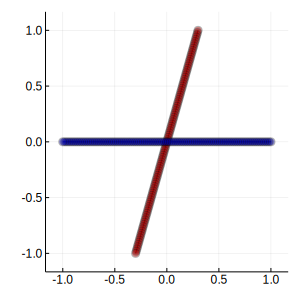

In [3]:
n = 100
L1 = P;
L2 = Q;
δ1 = (L1[end][1] - L1[1][1], L1[end][2] - L1[1][2]) ./ n
δ2 = (L2[end][1] - L2[1][1], L2[end][2] - L2[1][2]) ./ n
wh = 300

d = plot(size=(wh, wh), leg=false, xlims=[-1.1, 1.1], ylims=[-1.1, 1.1])
colors = [:red, :blue]
lδ = [δ1, δ2]
for (id, line) in enumerate([P, Q])
    plot!(d, [line[1][1], line[end][1]], [line[1][2], line[end][2]], color=colors[id])
    
    x0 = line[1][1]
    y0 = line[1][2]
    for i in 0:n
        x = x0 + lδ[id][1] * i
        y = y0 + lδ[id][2] * i
        plot!(d, [x], [y], seriestype=:scatter, color=colors[id], alpha=0.3)
    end
end
d

### Compute Free-space Diagram between two segments

In [4]:
δ1 = (L1[end][1] - L1[1][1], L1[end][2] - L1[1][2]) ./ n
δ2 = (L2[end][1] - L2[1][1], L2[end][2] - L2[1][2]) ./ n
Fϵ = zeros(Float16, n + 1, n + 1);
lx = [(L1[1][1] + δ1[1] * i, L1[1][2] + δ1[2] * i) for i in 0:n]
ly = [(L2[1][1] + δ2[1] * i, L2[1][2] + δ2[2] * i) for i in 0:n]

for dx in 1:n+1
    xi = lx[dx]
    for dy in 1:n+1
        yi = ly[dy]
        
        diffx = xi[1] - yi[1]
        diffy = xi[2] - yi[2]
        dxy = sqrt(diffx ^ 2 + diffy ^ 2)
        Fϵ[dx, dy] = dxy <= ϵ ? 0.0 : 1.0
    end
end
F = transpose(Fϵ);

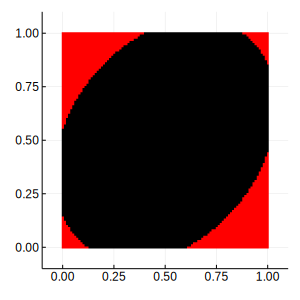

In [5]:
d = plot(size=(wh, wh), leg=false, xlims=[-0.1, 1.1], ylims=[-0.1, 1.1])
vx = collect(0:n) ./ n
vy = collect(0:n) ./ n
heatmap!(d, vx, vy, F, c=ColorGradient([:black, :red]))
d

### Fig.5

![](./free_cell_fig3.gif)

### compute values must be calculated in Fig. 5

In [6]:
LijF = Float64[0.0, 1.0]
RijF = Float64[0.0, 1.0]
BijF = Float64[0.0, 1.0]
TijF = Float64[0.0, 1.0]
vy1seq = [(i - 1) / n for i in 1:n+1 if F[1, i] < 1.0]
vx1seq = [(i - 1) / n for i in 1:n+1 if F[i, 1] < 1.0]
vy2seq = [(i - 1) / n for i in 1:n+1 if F[end, i] < 1.0]
vx2seq = [(i - 1) / n for i in 1:n+1 if F[i, end] < 1.0]
LijF[1] = vx1seq[1];
LijF[2] = vx1seq[end];
RijF[1] = vx2seq[1];
RijF[2] = vx2seq[end];
BijF[1] = vy1seq[1];
BijF[2] = vy1seq[end];
TijF[1] = vy2seq[1];
TijF[2] = vy2seq[end];
println(LijF, ":", RijF)
println(BijF, ":", BijF)

[0.15, 0.55]:[0.45, 0.85]
[0.13, 0.6]:[0.13, 0.6]


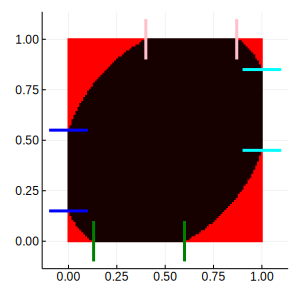

In [7]:
d = plot(size=(wh, wh), leg=false, xlims=[-0.1, 1.1], ylims=[-0.1, 1.1])
vx = collect(0:n) ./ n
vy = collect(0:n) ./ n
heatmap!(d, vx, vy, F, c=ColorGradient([:black, :red]))
plot!(d, [-0.1, 0.1], [LijF[1], LijF[1]], color=:blue, lw=3)
plot!(d, [-0.1, 0.1], [LijF[2], LijF[2]], color=:blue, lw=3)
plot!(d, [0.9, 1.1], [RijF[1], RijF[1]], color=:cyan, lw=3)
plot!(d, [0.9, 1.1], [RijF[2], RijF[2]], color=:cyan, lw=3)
plot!(d, [BijF[1], BijF[1]], [-0.1, 0.1], color=:green, lw=3)
plot!(d, [BijF[2], BijF[2]], [-0.1, 0.1], color=:green, lw=3)
plot!(d, [TijF[1], TijF[1]], [0.9, 1.1], color=:pink, lw=3)
plot!(d, [TijF[2], TijF[2]], [0.9, 1.1], color=:pink, lw=3)
savefig(d, "output3_BL.png")
d